In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Spotify -Raw Data.csv", encoding="ISO-8859-1")
df["streams"] = pd.to_numeric(df["streams"], errors="coerce")
df["in_spotify_playlists"] = pd.to_numeric(df["in_spotify_playlists"], errors="coerce")

# Summary statistics
print(df[["streams", "bpm", "danceability_%", "energy_%","in_spotify_playlists","instrumentalness_%"]].describe())

# Check for missing values
print(df.isnull().sum())


            streams         bpm  danceability_%    energy_%  \
count  9.520000e+02  953.000000       953.00000  953.000000   
mean   5.141374e+08  122.540399        66.96957   64.279119   
std    5.668569e+08   28.057802        14.63061   16.550526   
min    2.762000e+03   65.000000        23.00000    9.000000   
25%    1.416362e+08  100.000000        57.00000   53.000000   
50%    2.905309e+08  121.000000        69.00000   66.000000   
75%    6.738690e+08  140.000000        78.00000   77.000000   
max    3.703895e+09  206.000000        96.00000   97.000000   

       in_spotify_playlists  instrumentalness_%  
count            953.000000          953.000000  
mean            5200.124869            1.581322  
std             7897.608990            8.409800  
min               31.000000            0.000000  
25%              875.000000            0.000000  
50%             2224.000000            0.000000  
75%             5542.000000            0.000000  
max            52898.000000     

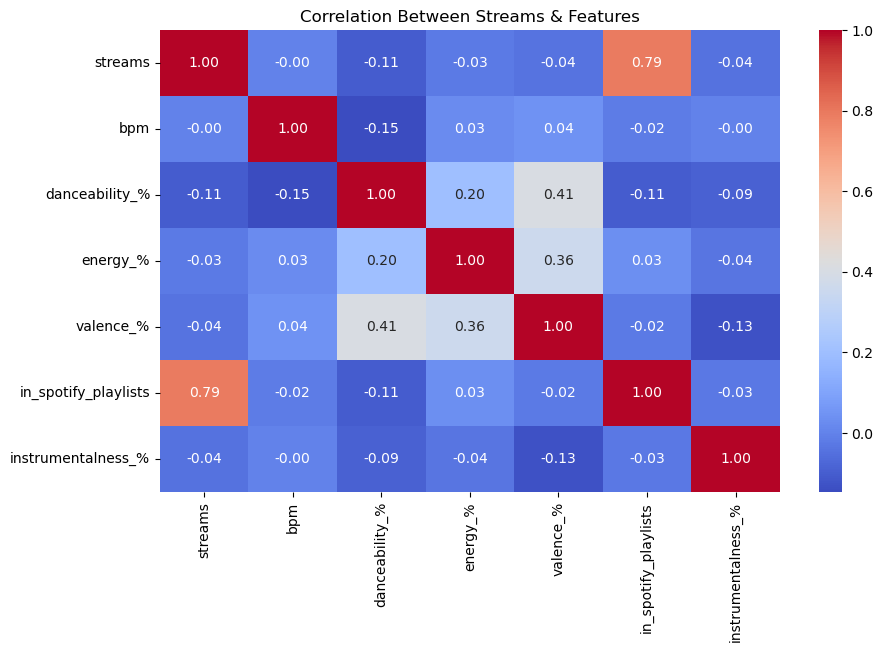

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[["streams", "bpm", "danceability_%", "energy_%", "valence_%","in_spotify_playlists","instrumentalness_%"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Streams & Features")
plt.show()


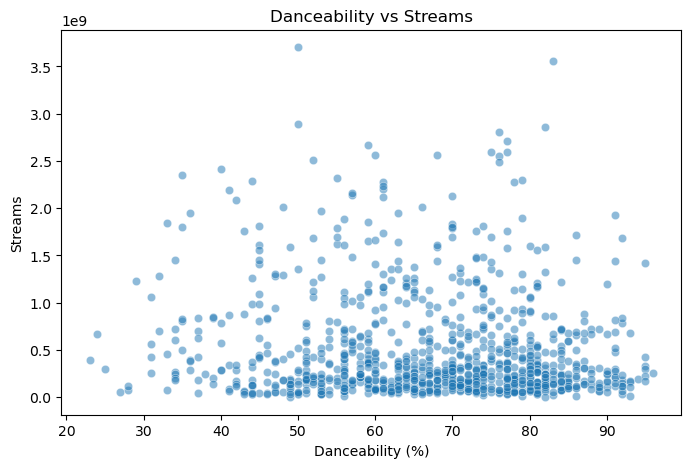

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["danceability_%"], y=df["streams"], alpha=0.5)
plt.title("Danceability vs Streams")
plt.xlabel("Danceability (%)")
plt.ylabel("Streams")
plt.show()


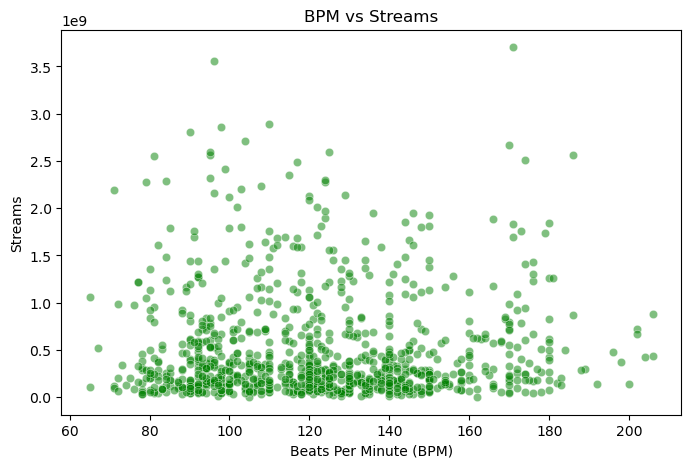

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["bpm"], y=df["streams"], alpha=0.5, color="green")
plt.title("BPM vs Streams")
plt.xlabel("Beats Per Minute (BPM)")
plt.ylabel("Streams")
plt.show()


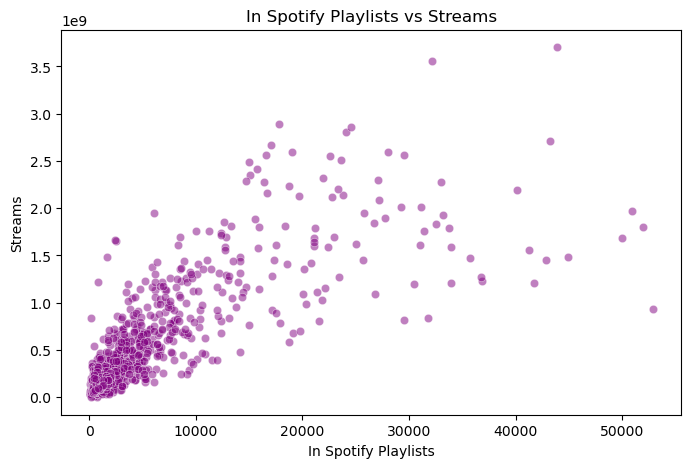

In [23]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["in_spotify_playlists"], y=df["streams"], alpha=0.5, color="purple")
plt.title("In Spotify Playlists vs Streams")
plt.xlabel("In Spotify Playlists")
plt.ylabel("Streams")
plt.show()

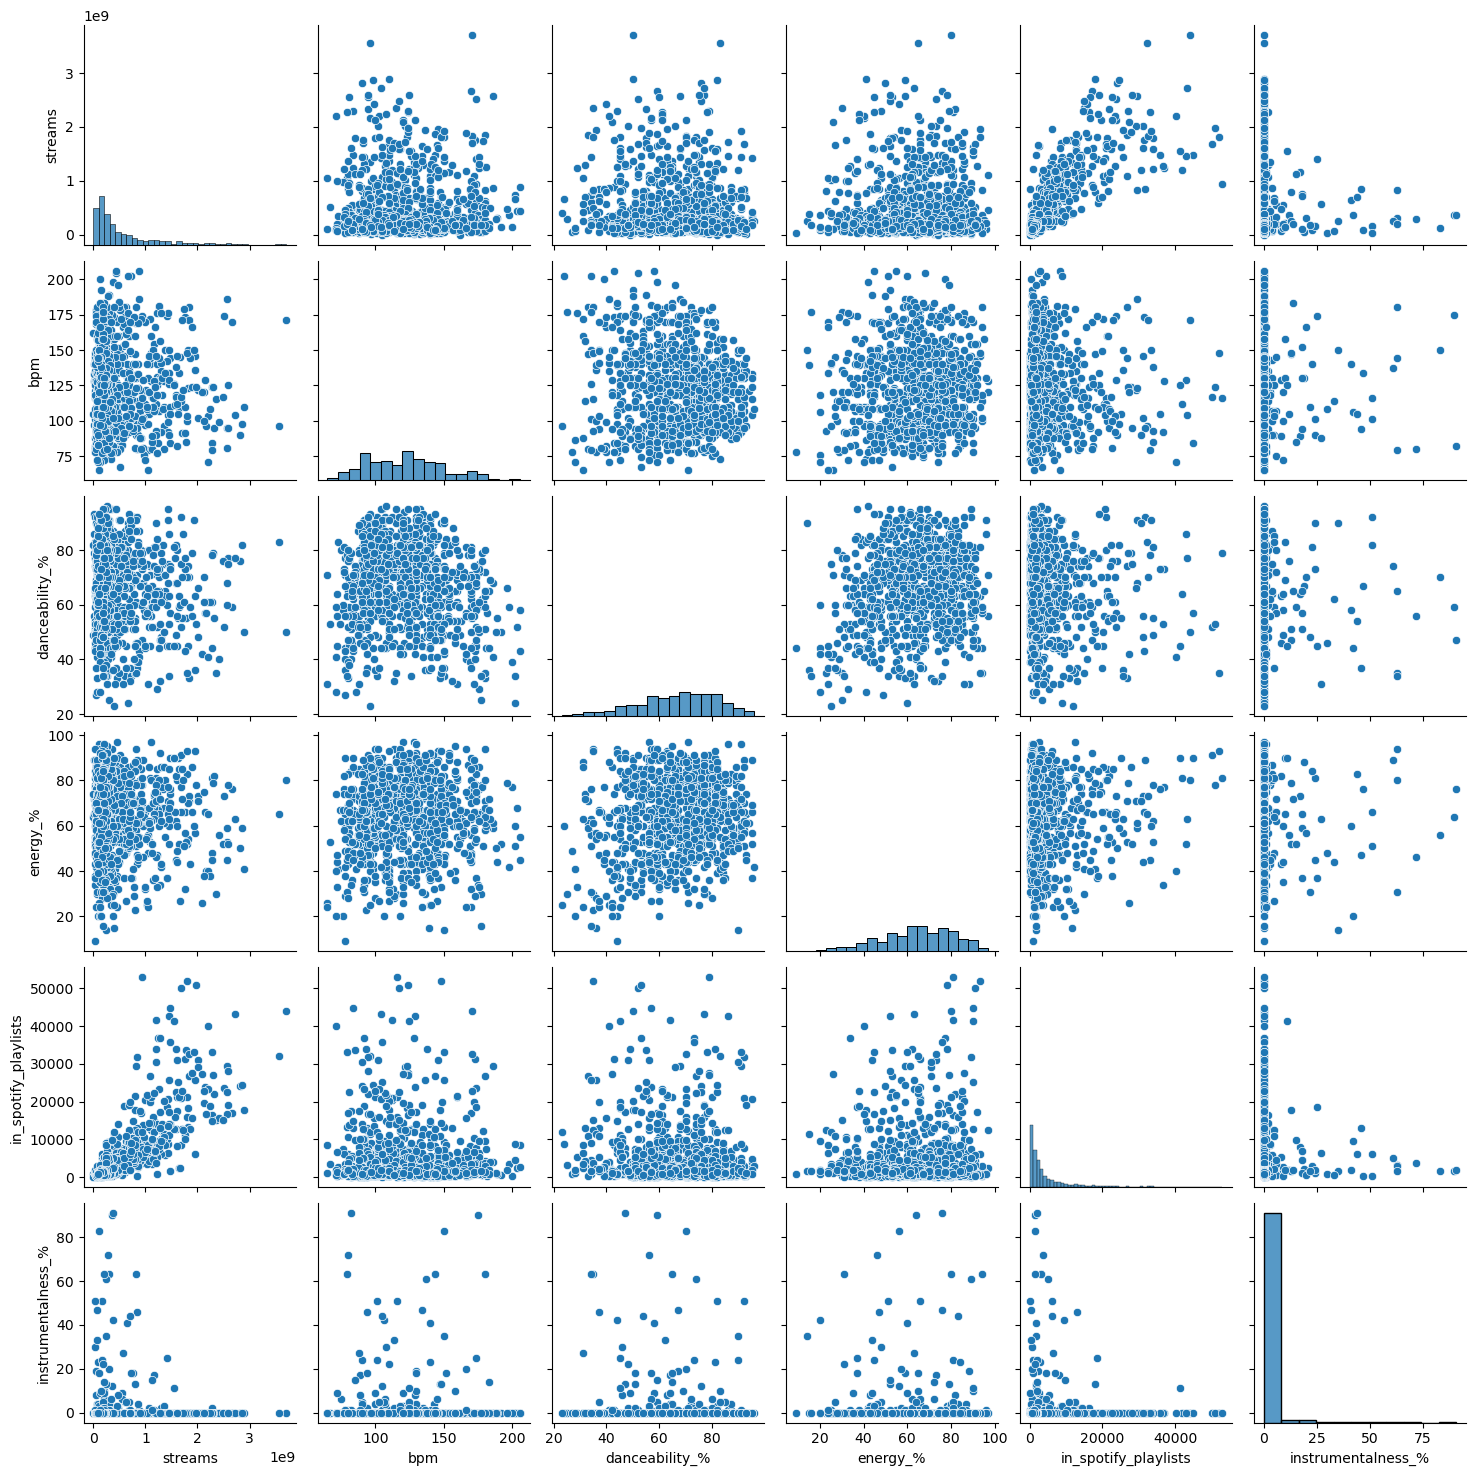

In [25]:
sns.pairplot(df[["streams", "bpm", "danceability_%", "energy_%","in_spotify_playlists","instrumentalness_%"]])
plt.show()
